# Uber pickups from April to September 2014 analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
import os

In [3]:
data_exmpl = pd.read_csv('../data/uber-raw-data-sep14.csv')

In [4]:
data_exmpl

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


Data from April to September of 2014 have all the same attributes, so we can merge them and analyze them together

In [5]:
df_apr_2014 = pd.read_csv('../data/uber-raw-data-apr14.csv')
df_may_2014 = pd.read_csv('../data/uber-raw-data-may14.csv')
df_jun_2014 = pd.read_csv('../data/uber-raw-data-jun14.csv')
df_jul_2014 = pd.read_csv('../data/uber-raw-data-jul14.csv')
df_aug_2014 = pd.read_csv('../data/uber-raw-data-aug14.csv')
df_sep_2014 = pd.read_csv('../data/uber-raw-data-sep14.csv')

In [6]:
month_mapping = {
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
}

In [7]:
data_list = [df_apr_2014, df_may_2014, df_jun_2014, df_jul_2014, df_aug_2014, df_sep_2014]
df_apr_sep_2014 = pd.concat(data_list, ignore_index=True)

In [7]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [9]:
display(HTML(f"<h2 style='text-align: center;'>Monthly data preview</h2>"))

html_content = '<div style="display: flex; flex-wrap: wrap; justify-content: center;">'

for i, df in enumerate(data_list, start=4):
    month_name = month_mapping.get(i, "Unknown")
    
    df_html = df.head().to_html(index=False)  
    html_content += f"""
    <div style="flex: 0 0 45%; margin: 10px; border: 1px solid #ddd; padding: 10px; text-align: center;">
        <h3>{month_name} data</h3>
        <p style="text-align: center;">Rows: {df.shape[0]}</p>
        <div style="display: inline-block; text-align: left;">
            {df_html}
        </div>
    </div>
    """
    
html_content += '</div>'

display(HTML(html_content))

Date/Time,Lat,Lon,Base
4/1/2014 0:11:00,40.7690,-73.9549,B02512
4/1/2014 0:17:00,40.7267,-74.0345,B02512
4/1/2014 0:21:00,40.7316,-73.9873,B02512
4/1/2014 0:28:00,40.7588,-73.9776,B02512
4/1/2014 0:33:00,40.7594,-73.9722,B02512
Date/Time,Lat,Lon,Base
5/1/2014 0:02:00,40.7521,-73.9914,B02512
5/1/2014 0:06:00,40.6965,-73.9715,B02512
5/1/2014 0:15:00,40.7464,-73.9838,B02512
5/1/2014 0:17:00,40.7463,-74.0011,B02512


We can take a look into unified dataset and then compare number of pickups for each month

In [8]:
for month_data in data_list:
    month_data['Date/ Time'] = pd.to_datetime(month_data['Date/Time'], format='%m/%d/%Y %H:%M:%S')
    month_data['Hour'] = month_data['Date/ Time'].dt.hour
    month_data['Month'] = month_data['Date/ Time'].dt.month
    month_data['Day'] = month_data['Date/ Time'].dt.day
df_apr_sep_2014 = pd.concat(data_list,ignore_index=True)

In [9]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month,Day
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,4,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,4,1
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,4,1
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,4,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,4,1
...,...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,9,30
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,9,30
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,9,30
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,9,30


In [12]:
months_data = pd.Series(df_apr_sep_2014['Month']).value_counts().rename(index=month_mapping)[::-1]

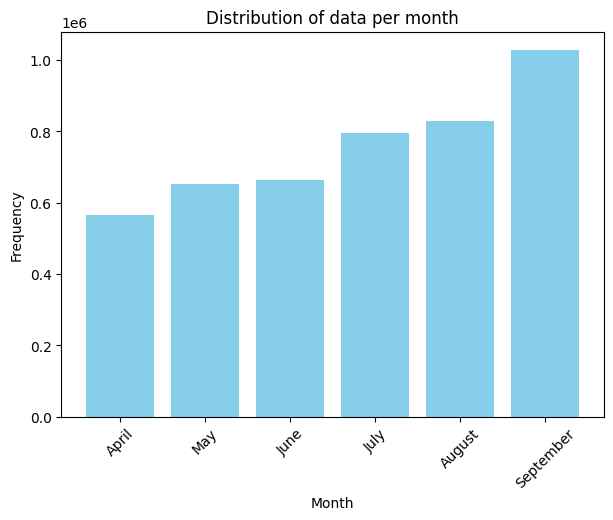

In [13]:
plt.figure(figsize=(7, 5))
plt.bar(months_data.index, months_data.values, color='skyblue')
plt.title('Distribution of data per month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

We can see that there are the most pickups recorded in September and the fewest in April. This disparity suggests that the data collection was more extensive during September, potentially capturing a period of higher Uber usage.

### Distribution of pickups between different hours in a day 

In [14]:
type(df_apr_sep_2014['Date/ Time'].dtype)

numpy.dtype[datetime64]

In [15]:
df_apr_sep_2014['Date/ Time'].dt.hour

0           0
1           0
2           0
3           0
4           0
           ..
4534322    22
4534323    22
4534324    22
4534325    22
4534326    22
Name: Date/ Time, Length: 4534327, dtype: int32

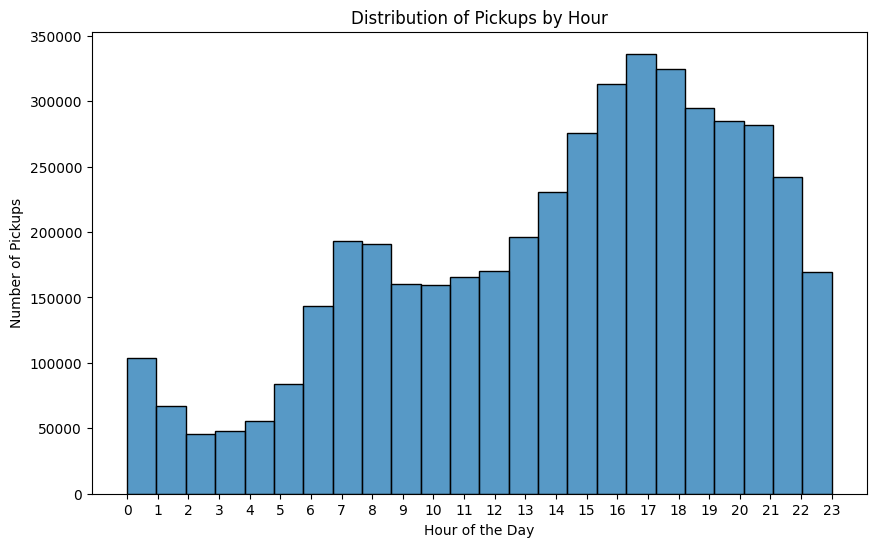

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df_apr_sep_2014['Hour'], bins=24, kde=False)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

The majority of pickups occur in the afternoon, particularly between 4 PM and 7 PM. This suggests that Uber usage peaks during the late afternoon, possibly due to people returning from work or heading out for evening activities.
The early morning hours (12 AM to 6 AM) see the fewest pickups, which could be attributed to lower demand during these hours as most people are likely asleep.

We can also see the distribution of pickups between hours considering belonging months 

In [17]:
from matplotlib.lines import Line2D

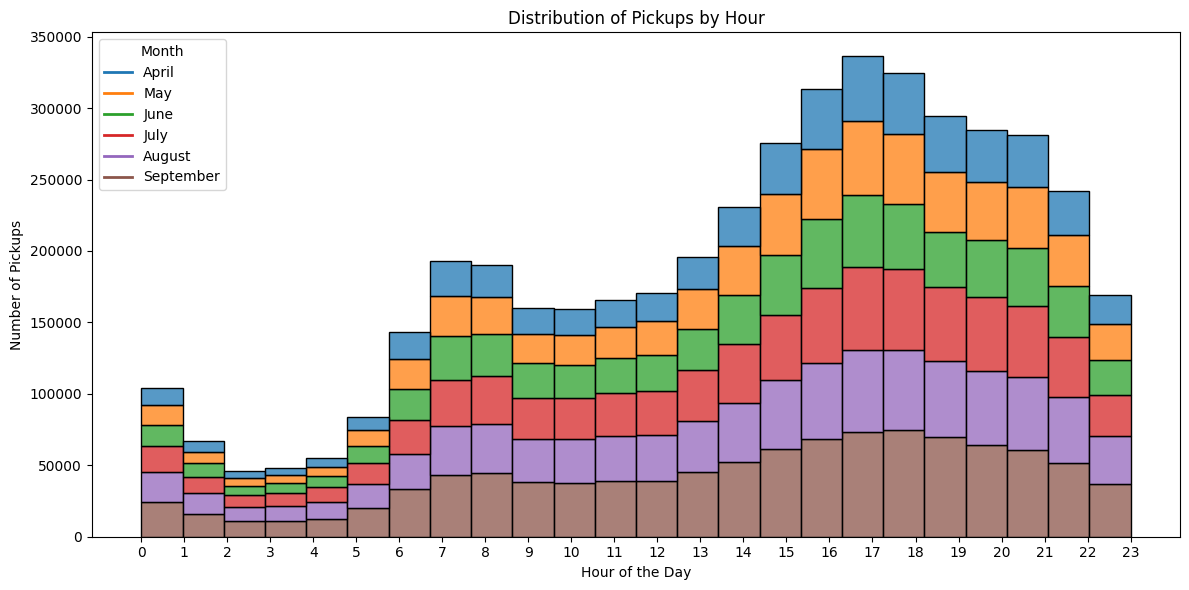

In [18]:
unique_months = df_apr_sep_2014['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [month_mapping.get(month, 'Unknown') for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=df_apr_sep_2014,x='Hour',hue='Month',multiple='stack', bins=24, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

When looking at the hourly distribution broken down by month, September has the highest volume of pickups, consistent with the dataset containing the most records for that month.

We can also examine how the data is distributed by hour for each month separately.

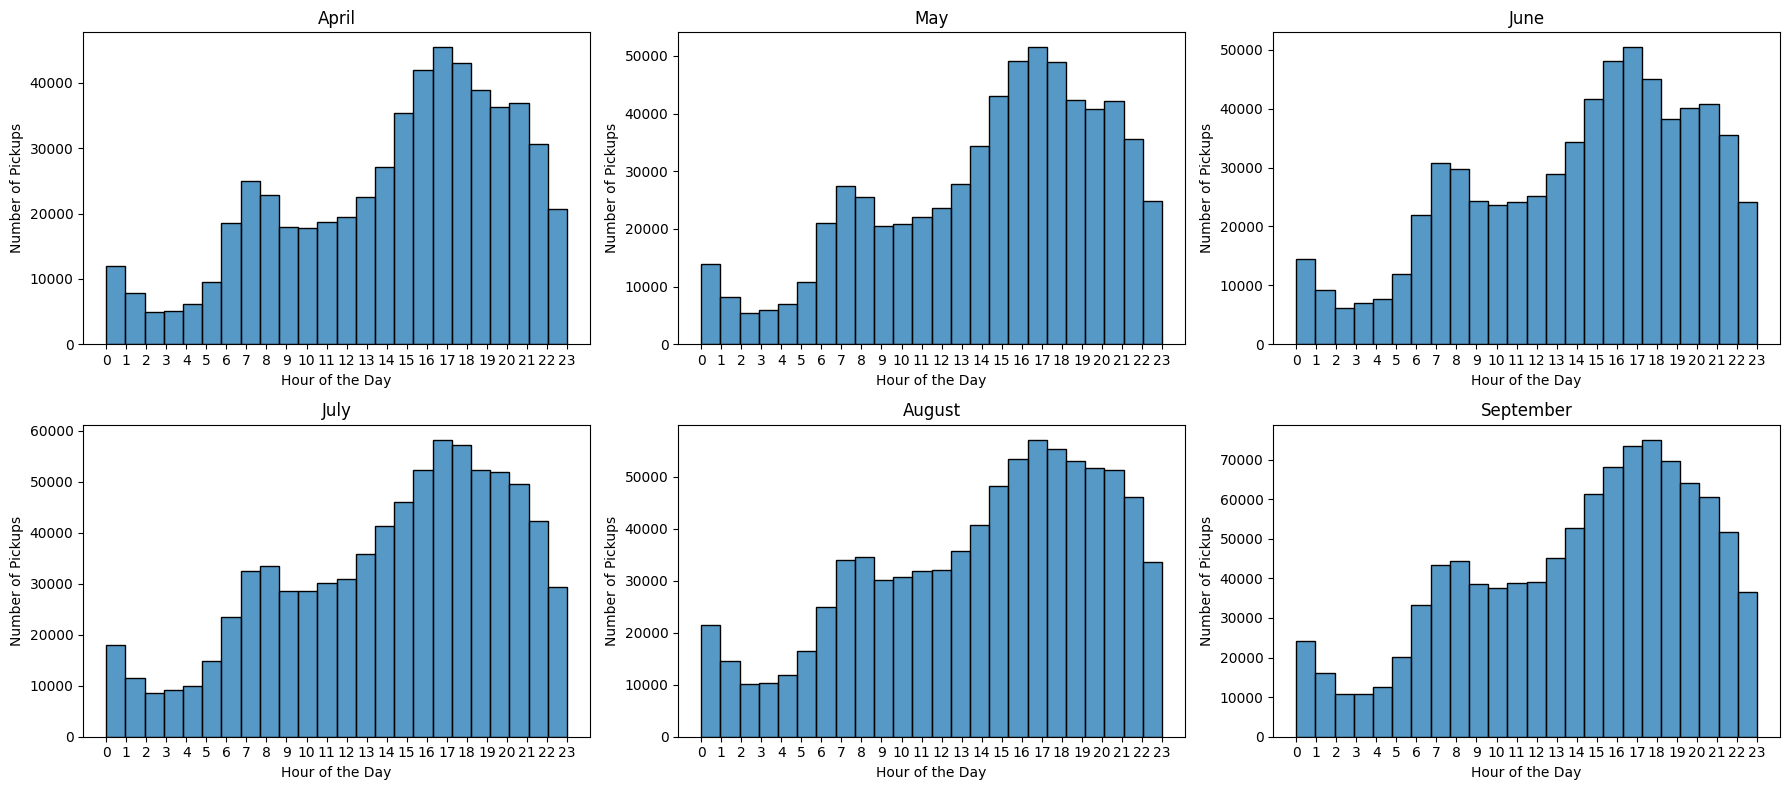

In [19]:
plt.figure(figsize=(18,8))

for i, month_data in enumerate(data_list):
    plt.subplot(2,3,i+1)
    sns.histplot(month_data['Hour'], bins=24, kde=False)
    plt.title(f'{month_mapping.get(i+4)}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Pickups')
    plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

The pattern of peak and off-peak hours remains consistent across months, with afternoons generally being busier. This reinforces the observation that Uber usage is heavily concentrated in the afternoon hours across different months.

### Distribution of data per days of a month

As we already saw how pickups are distributed for different hours of a day, it could also be interesting to see distribution within days in one month. 

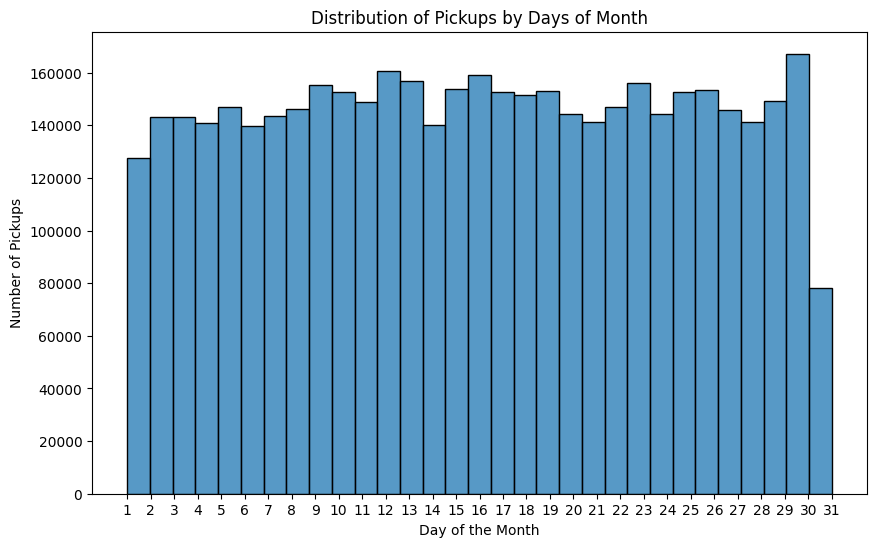

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df_apr_sep_2014['Day'], bins=31, kde=False)
plt.title('Distribution of Pickups by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.show()

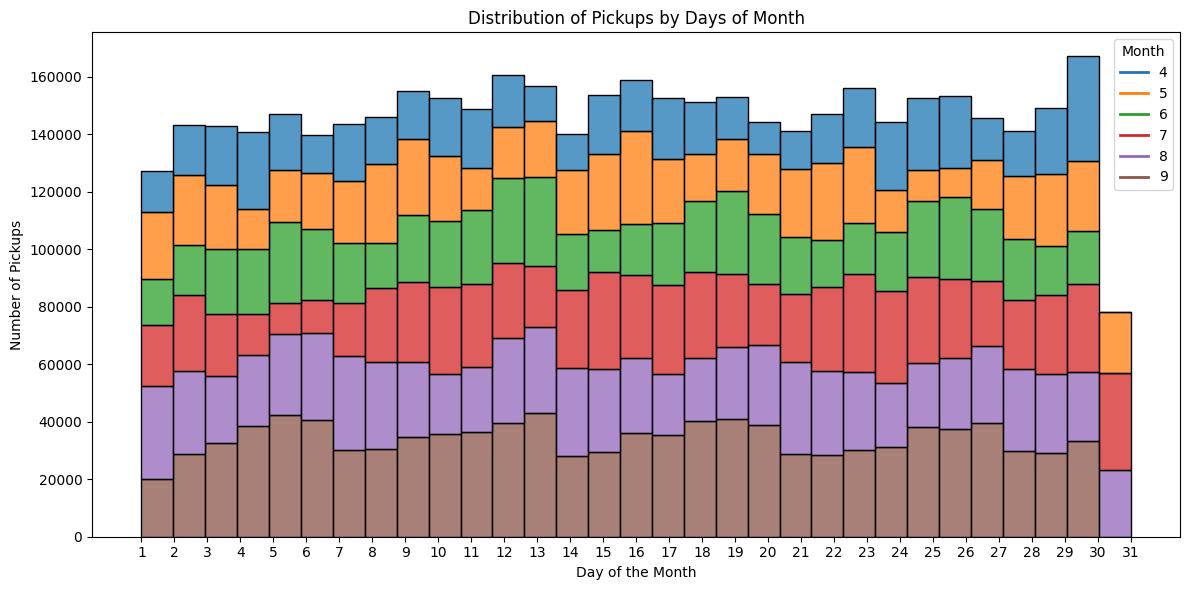

In [21]:
unique_months = df_apr_sep_2014['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [month for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=df_apr_sep_2014,x='Day',hue='Month',multiple='stack', bins=31, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

We can observe that the 30th of the month has the highest number of pickups, with April contributing the most to this day, as indicated by the color coding. When examining the distribution of pickups across the days in April, it's clear that this day has significantly more data than others. Since there were no special events or holidays in NYC on that day, the spike in Uber usage appears to be a coincidence and may not be relevant for further analysis.

Additionally, we notice that the 31st has the least data, which is expected since only some months have 31 days.

In [22]:
pd.value_counts(df_apr_2014['Day']).sort_values()

Day
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
Name: count, dtype: int64

In [23]:
np.unique(df_apr_2014['Date/ Time'].dt.day_of_week)

array([0, 1, 2, 3, 4, 5, 6])

### Distribution of pickups within days of week

In [24]:
df_apr_sep_2014['DayOfWeek'] = df_apr_sep_2014['Date/ Time'].dt.day_of_week

In [25]:
np.unique(df_apr_sep_2014['DayOfWeek'])

array([0, 1, 2, 3, 4, 5, 6])

In [26]:
np.unique(df_apr_sep_2014['Month'])

array([4, 5, 6, 7, 8, 9])

In [27]:
months_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
days_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

df_apr_sep_2014['Month'] = df_apr_sep_2014['Month'].map(months_map)
df_apr_sep_2014['DayOfWeek'] = df_apr_sep_2014['DayOfWeek'].map(days_map)

In [28]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month,Day,DayOfWeek
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,April,1,Tuesday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,April,1,Tuesday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,April,1,Tuesday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,April,1,Tuesday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,April,1,Tuesday
...,...,...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,September,30,Tuesday
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,September,30,Tuesday


In [29]:
data_agg = df_apr_sep_2014.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')

In [ ]:
months_order = [ 'April', 'May', 'June','July','August','September']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data_agg['Month'] = pd.Categorical(data_agg['Month'], categories=months_order, ordered=True)
data_agg['DayOfWeek'] = pd.Categorical(data_agg['DayOfWeek'], categories=days_order, ordered=True)

In [31]:
data_agg

,Month,DayOfWeek,count
0,April,Friday,90303
1,April,Monday,60861
2,April,Saturday,77218
3,April,Sunday,51251
4,April,Thursday,85067
5,April,Tuesday,91185
6,April,Wednesday,108631
7,August,Friday,148674
8,August,Monday,91633
9,August,Saturday,132225


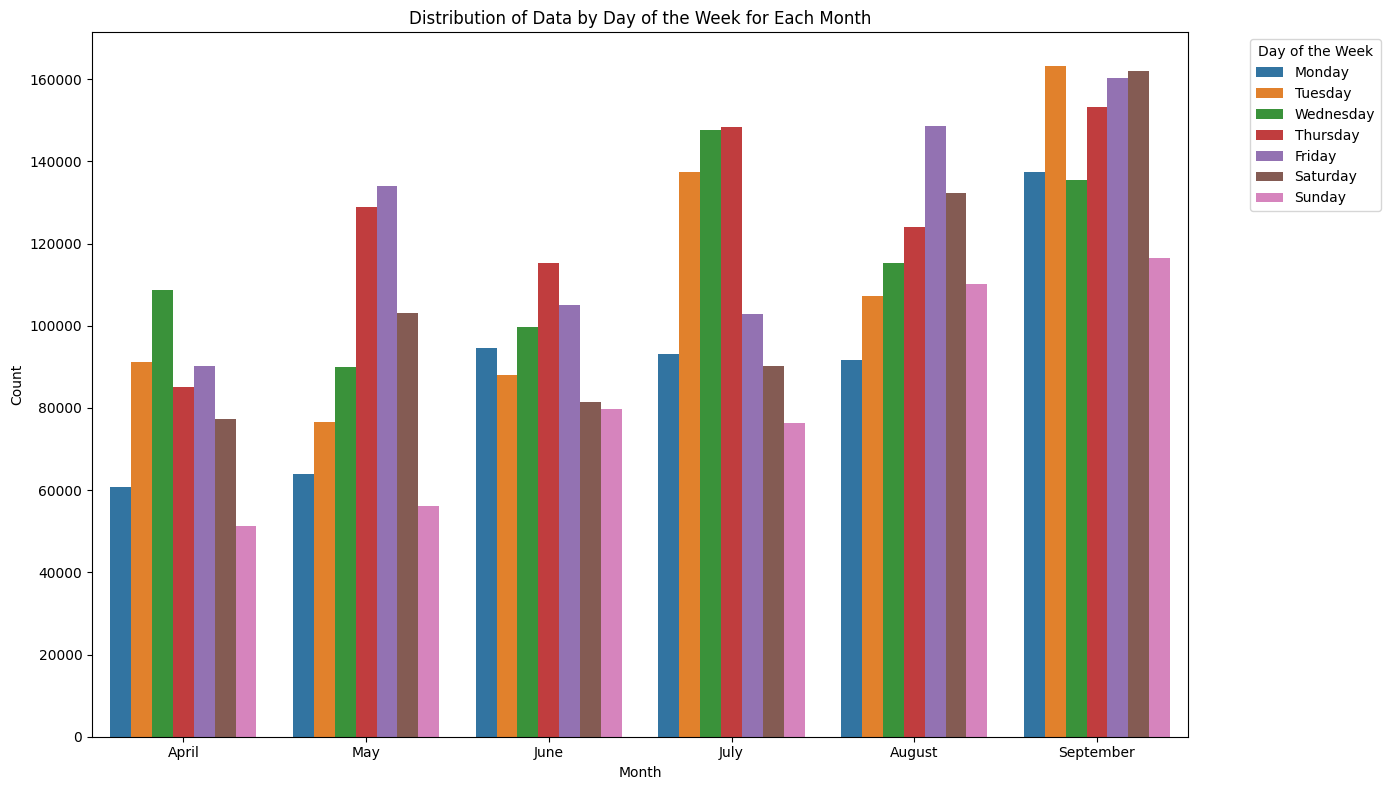

In [32]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg, x='Month', y='count', hue='DayOfWeek', hue_order=days_order, palette='tab10')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Data by Day of the Week for Each Month')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

Looking at this plot we can notice that Sunday is generaly day when people use uber least, next to Sunday is Monday being second from the end in most of the months. 
As of the day with largest consumption of uber, it defers within different months, so we cannot give a general conclusion.

We took a look into dependencies between hour/day/month and number of pickups

In [33]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month,Day,DayOfWeek
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,April,1,Tuesday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,April,1,Tuesday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,April,1,Tuesday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,April,1,Tuesday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,April,1,Tuesday
...,...,...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,September,30,Tuesday
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,September,30,Tuesday


We can see that we also have an information about Location of pickup and Base, lets see number of trips by bases

In [34]:
np.unique(df_apr_sep_2014['Base'])

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [35]:
pd.value_counts(df_apr_sep_2014['Base'])

Base
B02617    1458853
B02598    1393113
B02682    1212789
B02764     263899
B02512     205673
Name: count, dtype: int64

<Axes: xlabel='Base', ylabel='Count'>

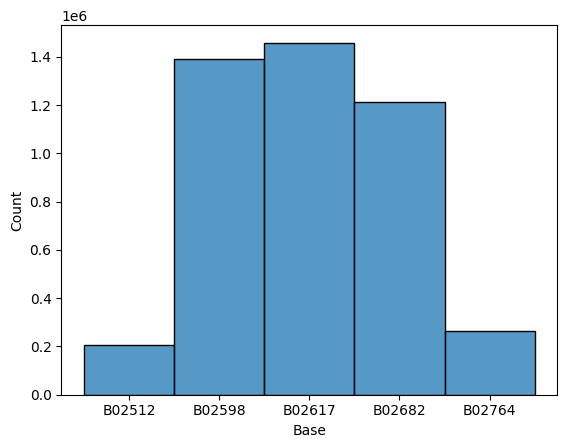

In [36]:
sns.histplot(df_apr_sep_2014['Base'])

So we can see that we have 5 different bases, and that base B02617 has the most trips overall through all 6 months.

Let's see distribution of trips per bases within different months

In [37]:
data_agg_bases_months = df_apr_sep_2014.groupby(['Base', 'Month']).size().reset_index(name='count')

In [38]:
data_agg_bases_months

,Base,Month,count
0,B02512,April,35536
1,B02512,August,31472
2,B02512,July,35021
3,B02512,June,32509
4,B02512,May,36765
5,B02512,September,34370
6,B02598,April,183263
7,B02598,August,220129
8,B02598,July,245597
9,B02598,June,242975


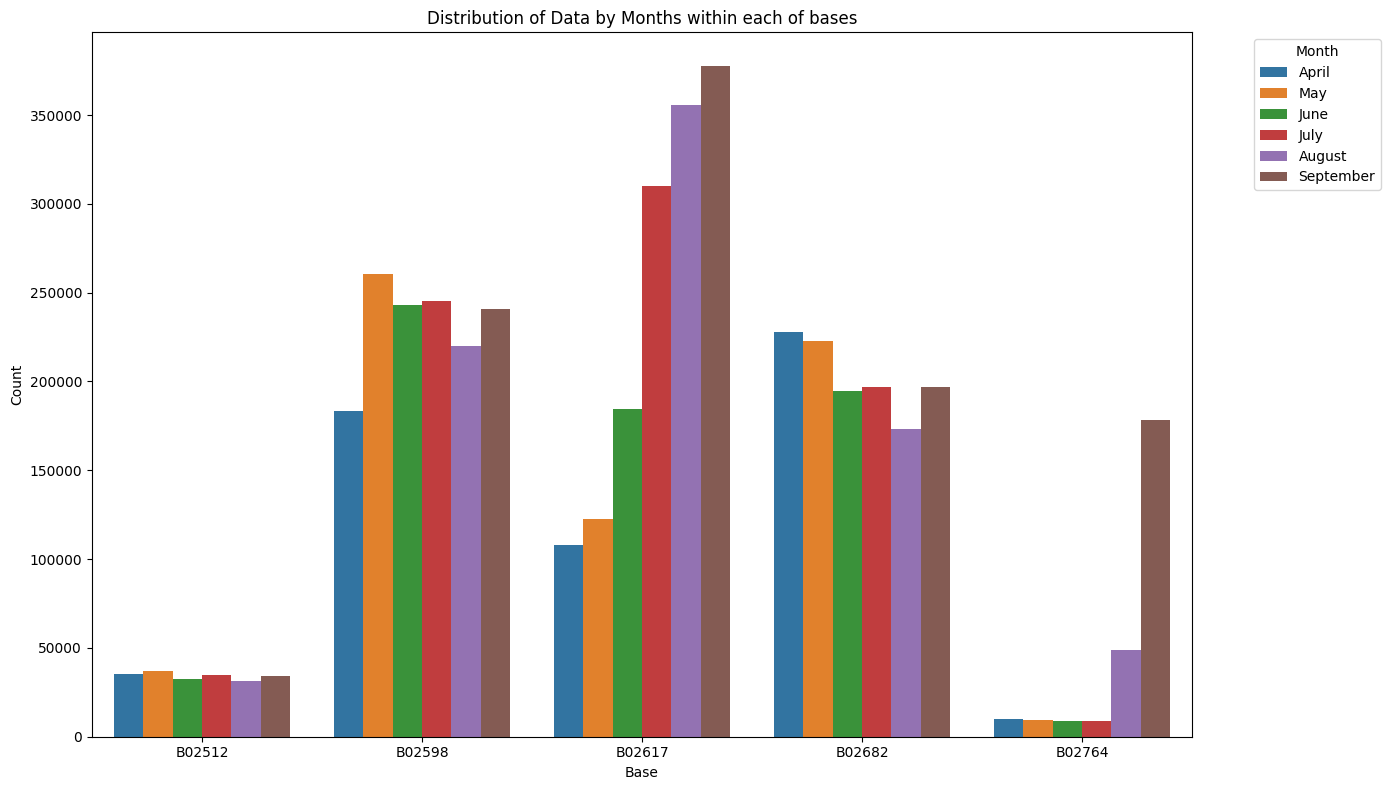

In [39]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg_bases_months, x='Base', y='count', hue='Month', hue_order=months_order, palette='tab10')

plt.xlabel('Base')
plt.ylabel('Count')
plt.title('Distribution of Data by Months within each of bases')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

Based on this plot we can see how active is what base on what month, as we previously stated that the most used base is B02617 it looks like it is mostly used during summer months July, August and September, when for other three months bases B02598 and B02682 have more piskups.

### It is also interesting to see dependency of trips base out of day of the week

In [40]:
data_agg_bases_days = df_apr_sep_2014.groupby(['Base','DayOfWeek']).size().reset_index(name='count')

In [41]:
data_agg_bases_days

,Base,DayOfWeek,count
0,B02512,Friday,33319
1,B02512,Monday,25460
2,B02512,Saturday,26773
3,B02512,Sunday,20490
4,B02512,Thursday,35032
5,B02512,Tuesday,31670
6,B02512,Wednesday,32929
7,B02598,Friday,229908
8,B02598,Monday,163542
9,B02598,Saturday,198832


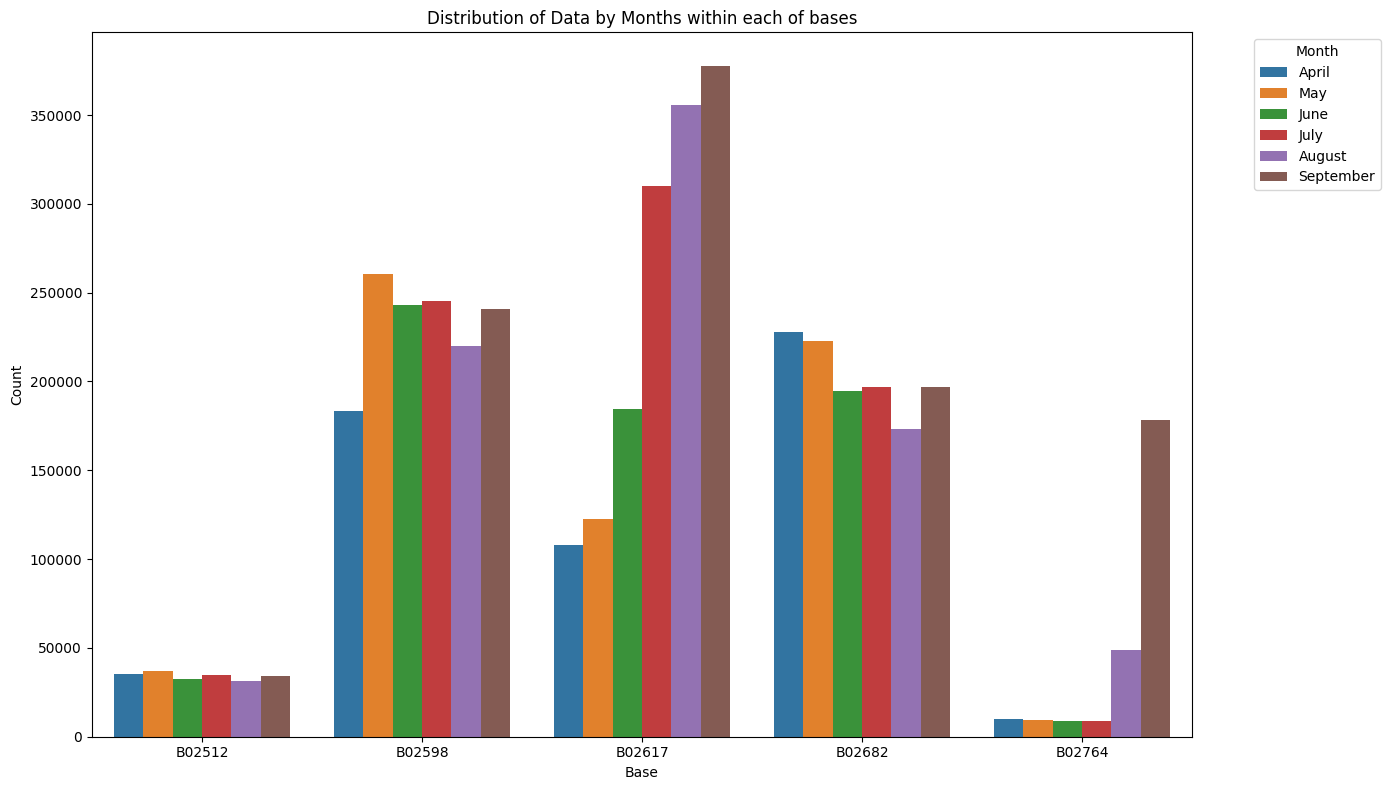

In [42]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg_bases_months, x='Base', y='count', hue='Month', hue_order=months_order, palette='tab10')

plt.xlabel('Base')
plt.ylabel('Count')
plt.title('Distribution of Data by Months within each of bases')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

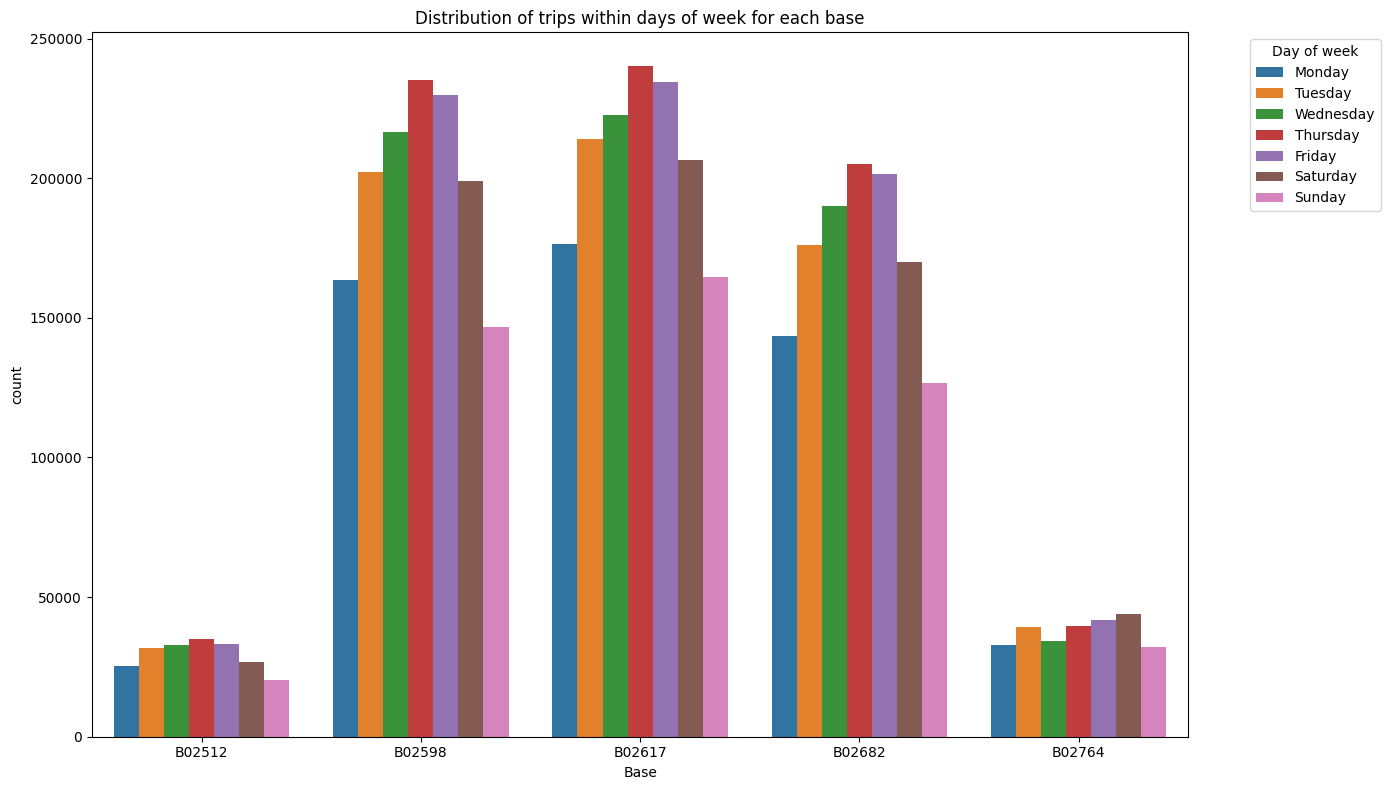

In [43]:
plt.figure(figsize=(14,8))

sns.barplot(data=data_agg_bases_days,x='Base',y='count',hue='DayOfWeek',hue_order=days_order,palette='tab10')

plt.xlabel('Base')
plt.ylabel('count')
plt.legend(title='Day of week',bbox_to_anchor=(1.05,1),loc='upper left')
plt.title('Distribution of trips within days of week for each base')
plt.tight_layout()
plt.show()

Firstly we can notice that base B02512 is low used trip base, but based on this and previous plot we can see that it has consistent number of trips for each month and for each day of week. (Looks like some kid of base that represents probably not that popular part of city (without some tourist attractions )) 

Next we can notice that for all three bases B02598, B02617 and B02682 we have simmilar distribution of trips within days of week, with wednesday being day of most trips

### Heatmap of day, hour and month

Let's take a look into mutual dependencies of these three atributes of trips 

####  Heatmap by Hour and Day

In [44]:
data_agg_day_hour = df_apr_sep_2014.groupby(['Day','Hour']).size().unstack(level=0)

In [45]:
data_agg_day_hour

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3247,2480,3415,2944,2786,4623,3715,2882,2708,3351,...,2852,2605,3277,2442,3887,5304,4224,2732,2439,2209
1,1982,1600,2176,1718,1567,2932,2326,1672,1757,2167,...,1662,1608,2090,1525,3123,3712,2711,1862,1547,1407
2,1284,1109,1434,1217,1047,1902,1533,1147,1246,1495,...,1207,1163,1480,1098,2087,2407,1894,1442,1135,1107
3,1331,1442,1489,1449,1278,1599,1622,1509,1501,1466,...,1503,1465,1520,1472,1840,2098,1846,1717,1436,935
4,1458,1897,1578,1737,1648,1584,1793,1921,1911,1614,...,1984,1994,1825,1972,1770,1759,1916,1990,1864,788
5,2171,2861,2437,2623,2958,2201,2464,3282,3227,2652,...,3222,3182,2802,3029,2389,2380,2846,3127,3264,1012
6,3717,5002,4318,4687,4919,3705,4172,5528,5910,4757,...,5315,5315,4565,5465,3838,3609,4368,5329,5850,1590
7,5470,6646,5775,6146,6379,4846,5649,7474,7720,6168,...,6981,7027,6111,7775,5282,5023,5828,6992,7735,2201
8,5376,6420,5482,5799,6580,5009,5459,7472,7641,6271,...,6995,6564,6024,7214,5169,5142,5759,6825,7760,2442


In [46]:
data_agg_day_hour = data_agg_day_hour.reindex(index=sorted(data_agg_day_hour.index, reverse=True))


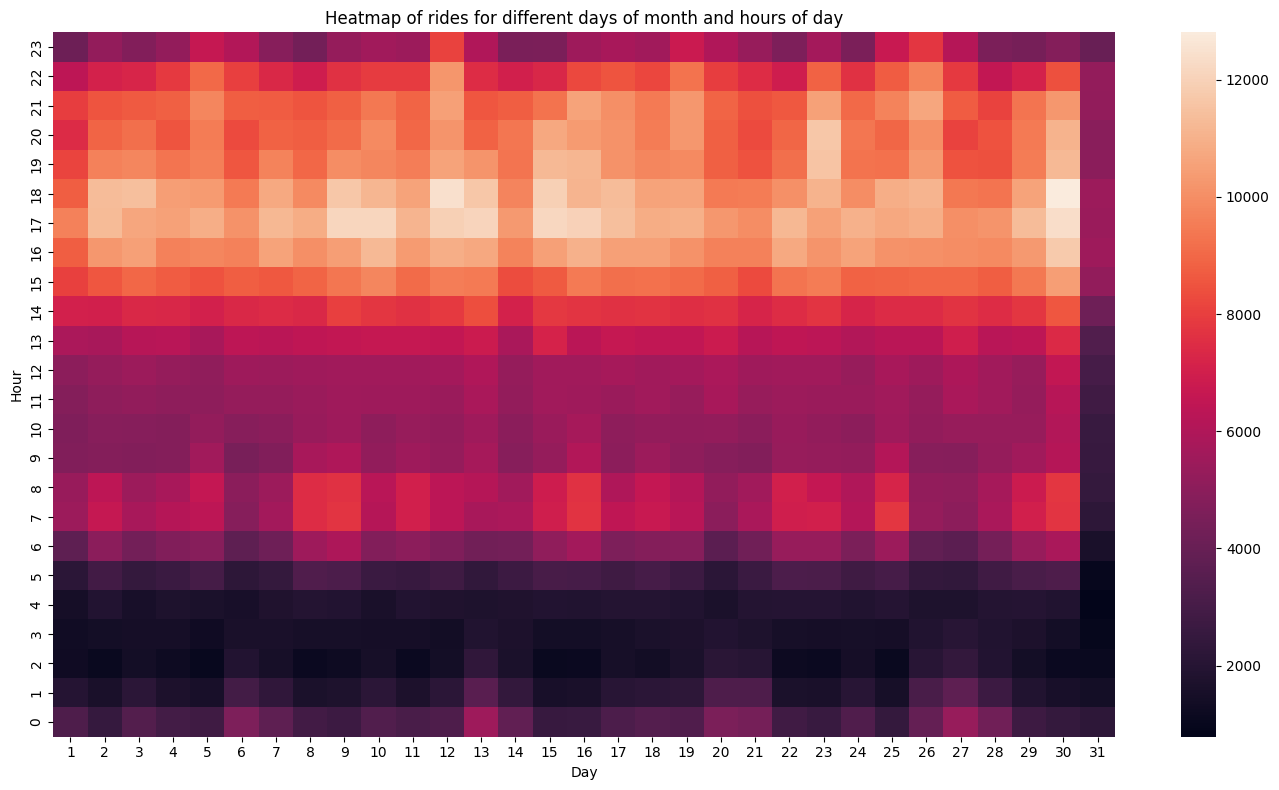

In [47]:
plt.figure(figsize=(14,8))

sns.heatmap(data=data_agg_day_hour,annot=False)

plt.title('Heatmap of rides for different days of month and hours of day')

plt.tight_layout()

plt.show()

Since the lighter colors represent more trips, we can notice that trips are simmilarly distributed within hours for all days of month, with most trips between 17-19h. And least trips between 1-5h.

#### HeatMap by Month and Day

In [48]:
data_agg_month_day = df_apr_sep_2014.groupby(['Day','Month']).size().unstack(level=0)

In [49]:
data_agg_month_day = data_agg_month_day.reindex(index=sorted(data_agg_month_day.index,reverse=True))

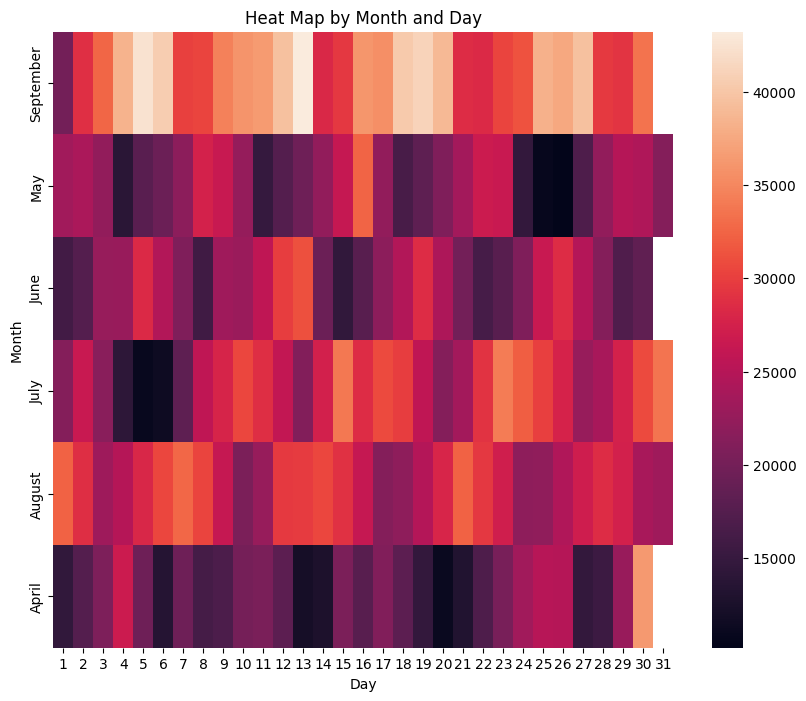

In [50]:
plt.figure(figsize=(10,8))

sns.heatmap(data_agg_month_day)

plt.title('Heat Map by Month and Day')

plt.show()

Looking at this heatmap we cannot make any valuable conclusions, we can't catch any pattern, but we can see that for some days have significantly less trip informations. Such as 13th, 14th, 20th of April, 25th and 26th of May, 4th to 6th of July. 
Possible reasons for these numbers can be found if we investigate what happened then:
1. April 13th, 2014, was Palm Sunday, a Christian observance marking the beginning of Holy Week, leading up to Easter (which was on April 20th). It is a significant day for Christians, and it's likely that people were celebrating the holiday, and therefore used Uber services much less.
2. May 26th was Memorial day that year, a federal holiday in the United States. Memorial Day is observed on the last Monday of May each year, and in 2014, it fell on May 26th. It's a day dedicated to honoring and remembering the men and women who have died while serving in the U.S. military. Many people have the day off, and it's marked by ceremonies, parades, and other events.
3. July 4th is Independence Day, a federal holiday in the United States. It is one of the most significant holidays in the U.S., celebrating the country's independence.

#### Heat Map of Month and Day of Week

In [51]:
data_agg_month_weekday = df_apr_sep_2014.groupby(['DayOfWeek','Month']).size().unstack(level=0)

In [52]:
data_agg_month_weekday = data_agg_month_weekday.reindex(index=sorted(data_agg_month_weekday.index,reverse=True))

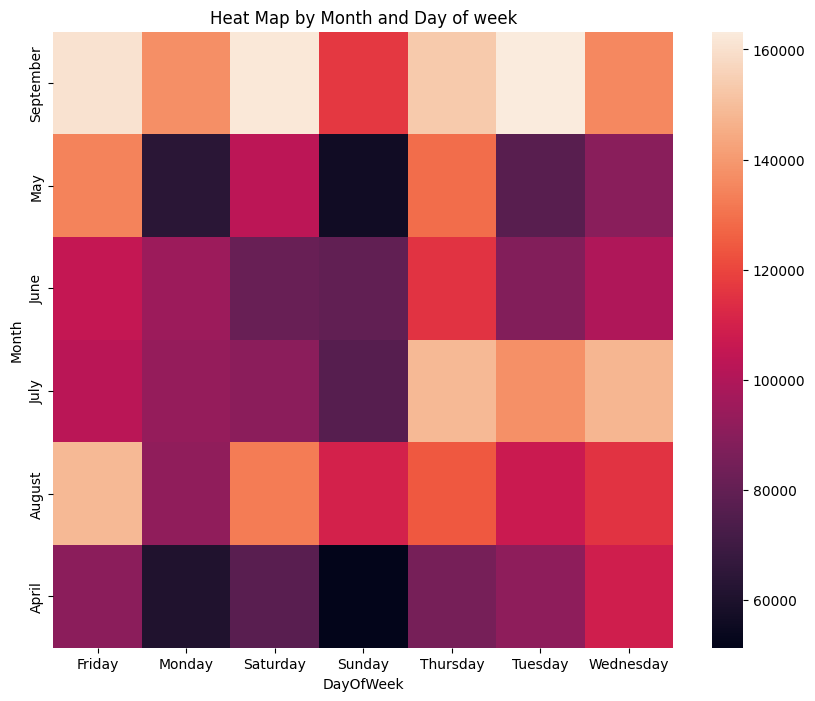

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(data_agg_month_weekday)
plt.title('Heat Map by Month and Day of week')
plt.show()

As we already noticed when we were observing barplots of these dependencies, for each month weekend days Saturday have least amount of trips. (Sve isto sto sam i ranije zakljucio)

#### Heat Map by Month and Bases

In [54]:
data_agg_month_bases = df_apr_sep_2014.groupby(['Base','Month']).size().unstack(level=0)

In [55]:
data_agg_month_bases = data_agg_month_bases.reindex(index=sorted(data_agg_month_bases.index,reverse=True))

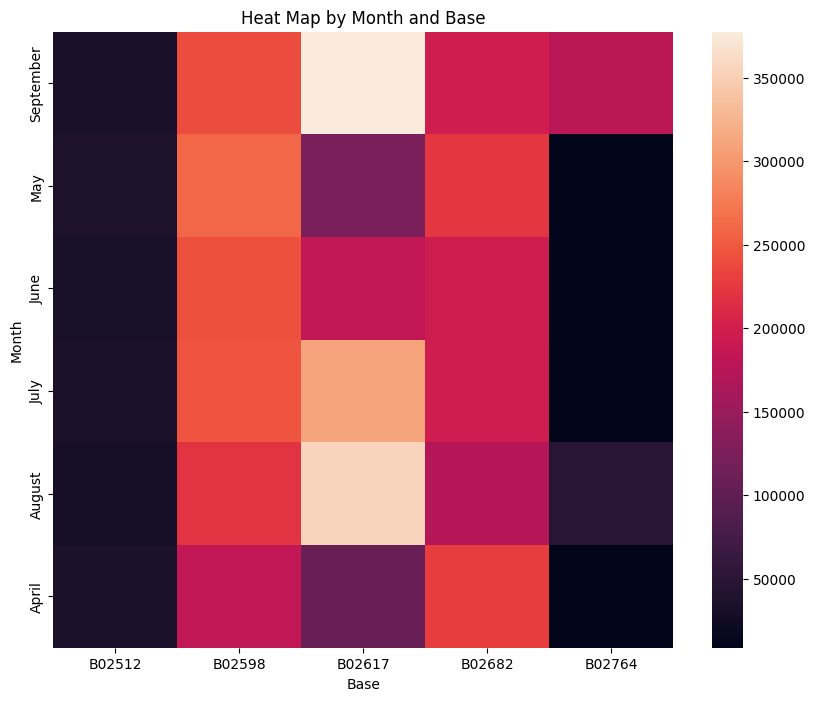

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(data_agg_month_bases)
plt.title('Heat Map by Month and Base')
plt.show()

As we mentioned earlier B02512 and B02764 are least used bases thrugh all months.
B02617 is significantly more used than other bases in July, August and September. But for May and Jun B02598 is most used base.

#### Heat Map by Base and Day of Week

In [57]:
data_agg_base_weekday = df_apr_sep_2014.groupby(['Base','DayOfWeek']).size().unstack(level=0)

In [58]:
data_agg_base_weekday = data_agg_base_weekday.reindex(index=sorted(data_agg_base_weekday.index,reverse=True))

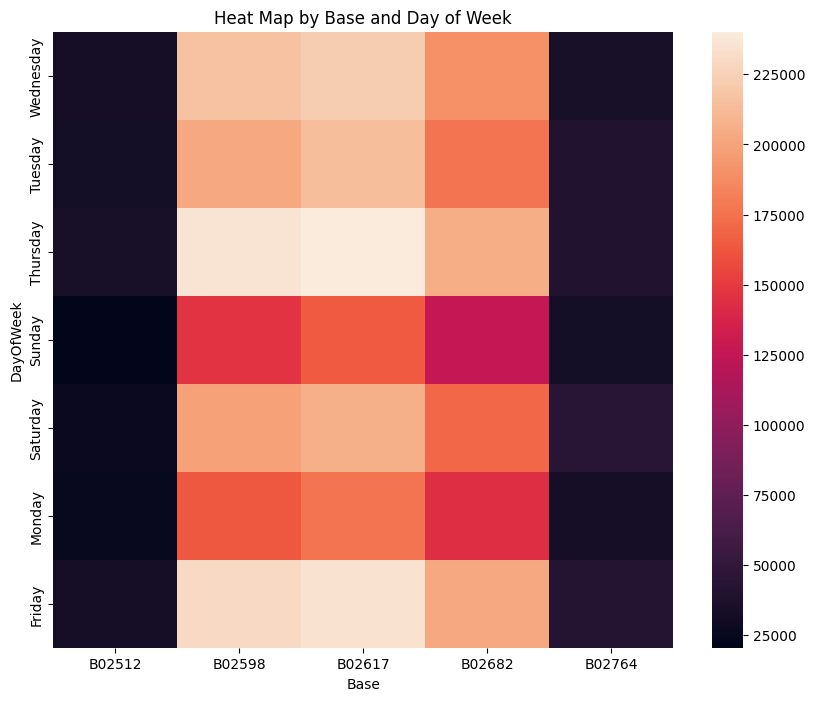

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(data_agg_base_weekday)
plt.title('Heat Map by Base and Day of Week')
plt.show()

We already noticed that B02512 and B02764 are low used comparing to others, and that stands independant of the day of week, other three bases are least used in weekends and are most used on Wednesday and Thursday.

### Scatter plot of locations of pickups

In [60]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month,Day,DayOfWeek
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,April,1,Tuesday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,April,1,Tuesday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,April,1,Tuesday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,April,1,Tuesday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,April,1,Tuesday
...,...,...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,September,30,Tuesday
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,September,30,Tuesday


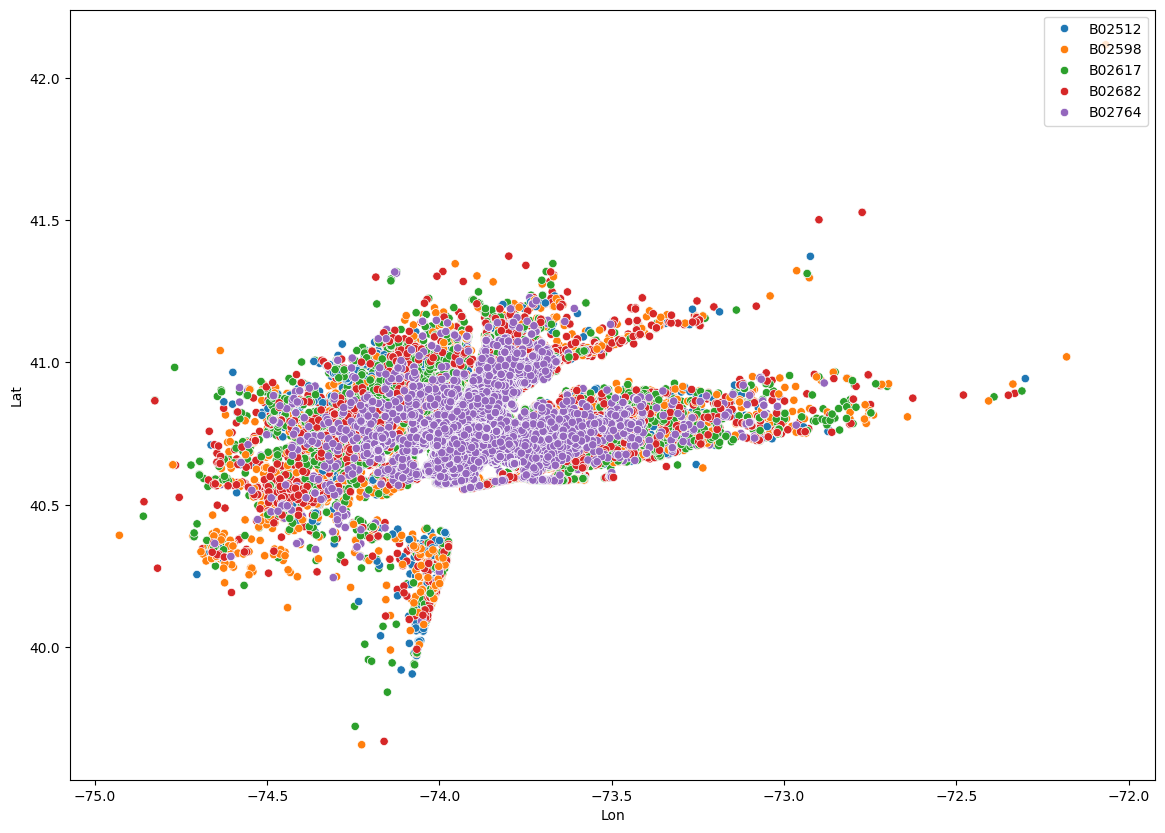

In [61]:
plt.figure(figsize=(14,10))

sns.scatterplot(df_apr_sep_2014, x='Lon', y='Lat', hue='Base')
plt.legend(loc='upper right')

plt.show()

In [62]:
df_apr_sep_2014

,Date/Time,Lat,Lon,Base,Date/ Time,Hour,Month,Day,DayOfWeek
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,0,April,1,Tuesday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,0,April,1,Tuesday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,0,April,1,Tuesday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,0,April,1,Tuesday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,0,April,1,Tuesday
...,...,...,...,...,...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30 22:57:00,22,September,30,Tuesday
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30 22:58:00,22,September,30,Tuesday
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30 22:58:00,22,September,30,Tuesday


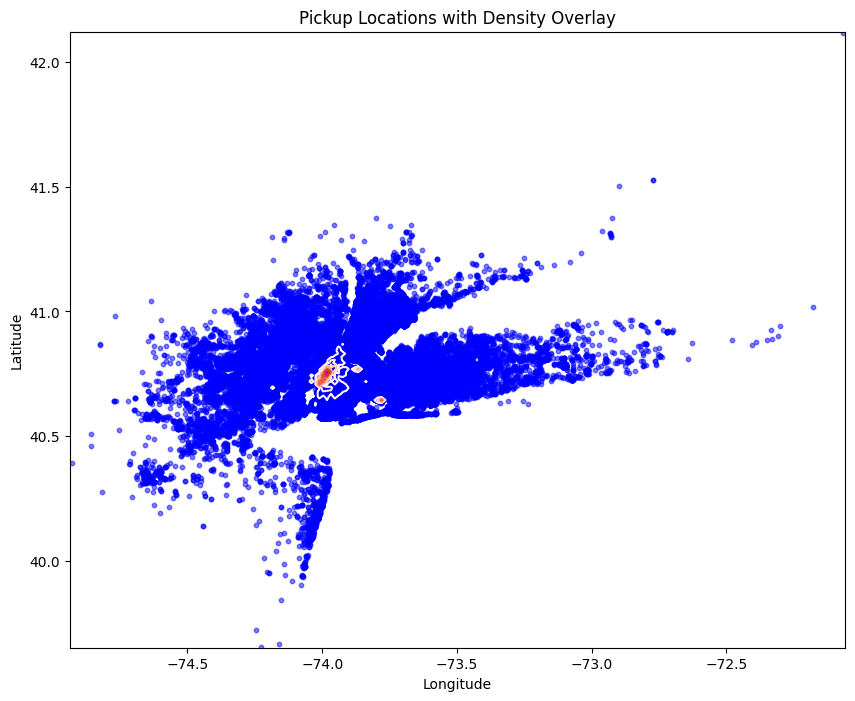

In [63]:
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_apr_sep_2014['Lon'], y=df_apr_sep_2014['Lat'], cmap="Reds", bw_adjust=.5)
plt.scatter(df_apr_sep_2014['Lon'], df_apr_sep_2014['Lat'], color='blue', alpha=0.5, s=10)
plt.title('Pickup Locations with Density Overlay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm #Colormap

#Animation Modules
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

from IPython.display import HTML


In [12]:
top, bottom, left, right = 41, 40.55, -74.3, -73.6
#39.6569 42.1166 -74.929 -72.0666
#Extracting the Longitude and Latitude of each pickup in our dataset
Longitudes = df_apr_sep_2014['Lon'].values
Latitudes  = df_apr_sep_2014['Lat'].values

In [43]:
Latitudes

array([40.769 , 40.7267, 40.7316, ..., 40.8519, 40.7081, 40.714 ])

In [24]:
df_reduced = df_apr_sep_2014.drop_duplicates(['Lat','Lon'])

In [25]:
Longitudes_reduced = df_reduced['Lon']
Latitudes_reduced  = df_reduced['Lat']

In [ ]:
fig = plt.figure(figsize = (12, 8)) 
ax = plt.axes(xlim=(left, right), ylim=(bottom, top)) 

dot, = ax.plot([], [], '.', ms=2, alpha=.5, color = 'blue') 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    dot.set_data([], []) 
    return dot, 

# lists to store x and y axis points 
x_data, y_data = [], [] 

# animation function 
def animate(i): 

    # x, y values to be plotted 
    x = Longitudes_reduced.iloc[i] 
    y = Latitudes_reduced.iloc[i]
    
    # appending new points to x, y axes points list 
    x_data.append(x) 
    y_data.append(y) 
    dot.set_data(x_data, y_data) 
    return dot, 

# setting a title for the plot 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Animation of New York Uber pickups from April to September 2014') 

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=df_reduced.shape[0], interval=1, blit=True) 

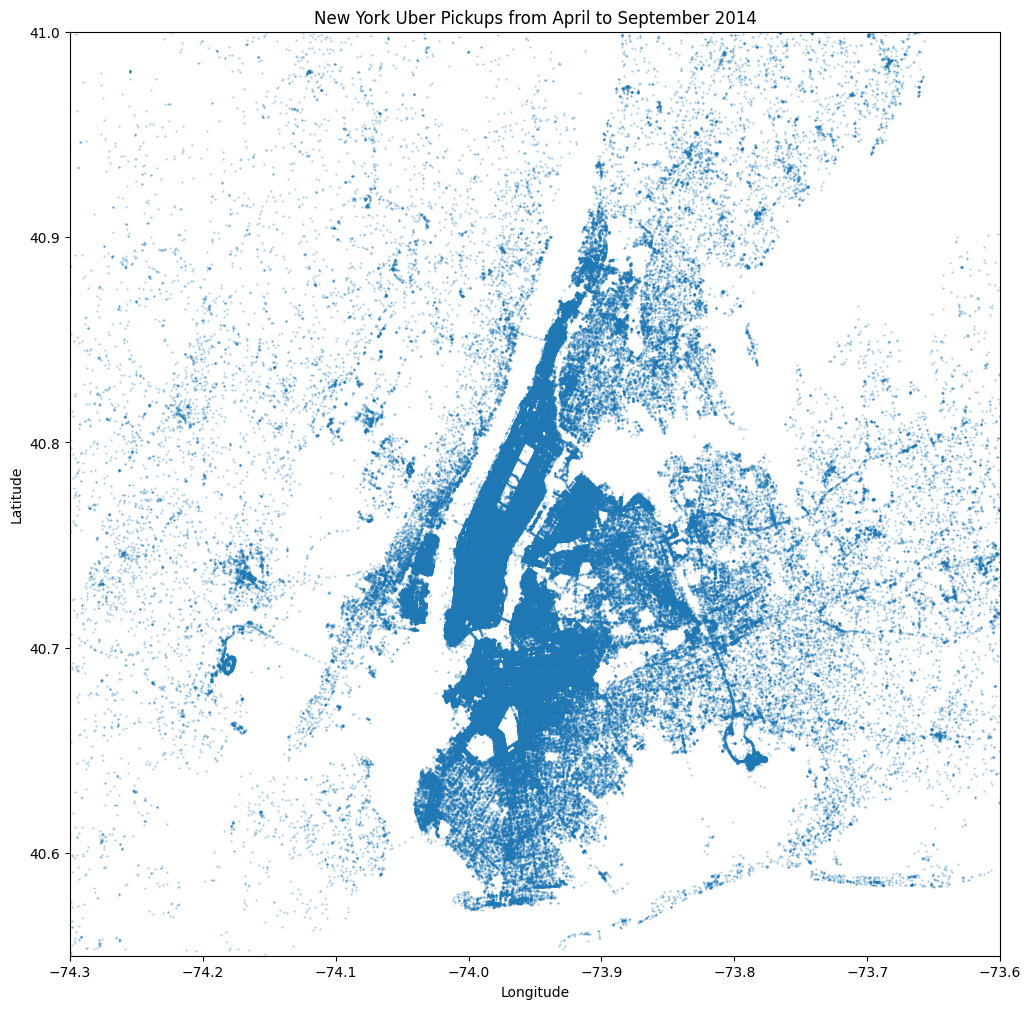

In [29]:
%matplotlib inline

plt.figure(figsize=(12, 12))

plt.plot(Longitudes_reduced, Latitudes_reduced, '.', ms=.8, alpha=.5)

plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups from April to September 2014')

plt.show()

In [57]:
plt.show()

In [37]:
import matplotlib.cm as cm

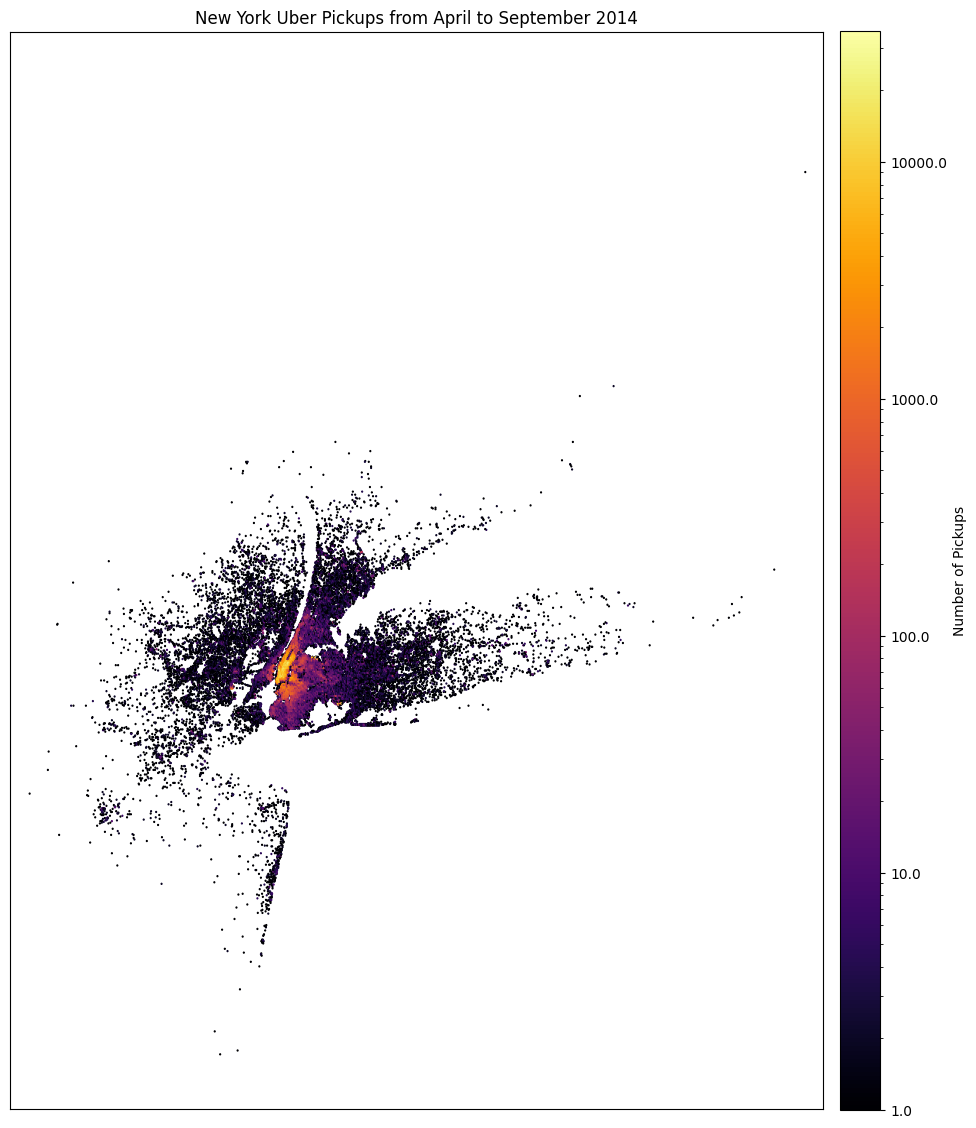

In [11]:
plt.figure(figsize=(18, 14))
plt.title('New York Uber Pickups from April to September 2014')

map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups')
plt.show()

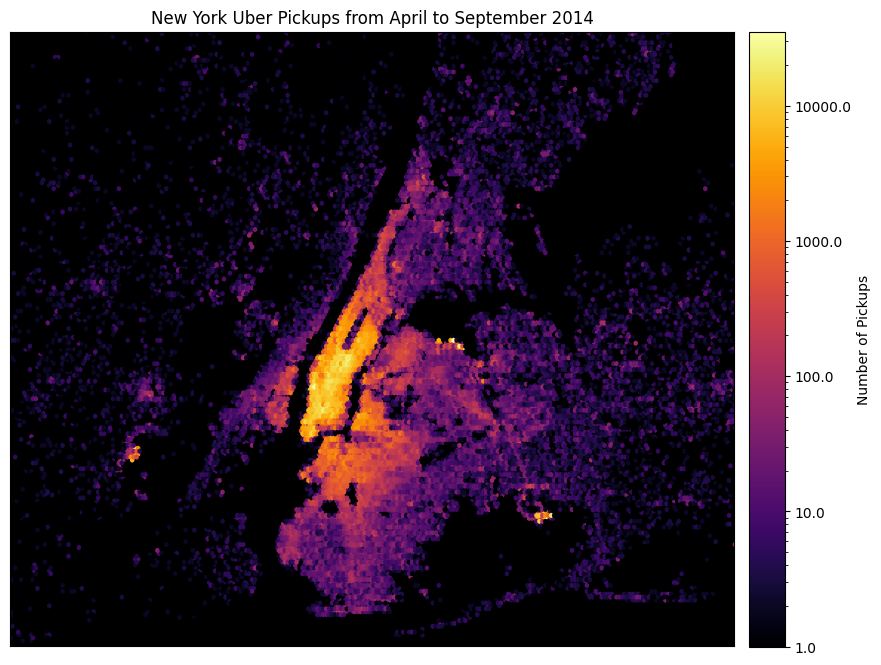

In [23]:
plt.figure(figsize=(10, 10))
plt.title('New York Uber Pickups from April to September 2014')

ax = plt.gca()
ax.set_facecolor('black')

map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups')
plt.show()

From our spacial visualization we observe that:

Most of Uber's trips in New York are made from Midtown to Lower Manhattan.
Followed by Upper Manhattan and the Heights of Brooklyn.
Lastly Jersey City and the rest of Brooklyn.
We see some brighter spots in our heatmap, corresponding to :

    -LaGuardia Airport in East Elmhurst.
    -John F. Kennedy International Airport.
    -Newark Liberty International Airport.
We know that many airports have specific requirements about where customers can be picked up by vehicles on the Uber platform. We can assume that these three airports have them, since they represent a big part of uber's business in New York